In [1]:
import numpy 
import math 
from matplotlib import pyplot
%matplotlib inline

In [2]:
N = 50           # number of points in each direction 

x_start, x_end = -2.0, 2.0               # sets boundaries in the x direction
y_start, y_end = -1.0, 1.0               # sets boundaries in the y direction
x = numpy.linspace(x_start, x_end, N)    # computes a 1D array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D array for y
X, Y = numpy.meshgrid(x, y)              # generates a mech grid 

In [3]:
gamma = 5.0  # strength of the vortex
x_vortex, y_vortex = 0.0, 0.0  # location of the vortex


In [4]:
# define the function for the velocity vortex
def get_velocity_vortex(strength, xv, yv, X, Y):
    u = strength / (2 * numpy.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * numpy.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    return u,v

In [5]:
# define the stream function for the vortex
def get_stream_function_vortex(strength, xv, yv, X, Y):
    psi = strength / (4 * math.pi) * numpy.log((X - xv)**2 + (Y - yv)**2)
    return psi

In [6]:
# compute the veloctiy field of the mesh grid
u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)

# compute the stream-function on the mesh grid
psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

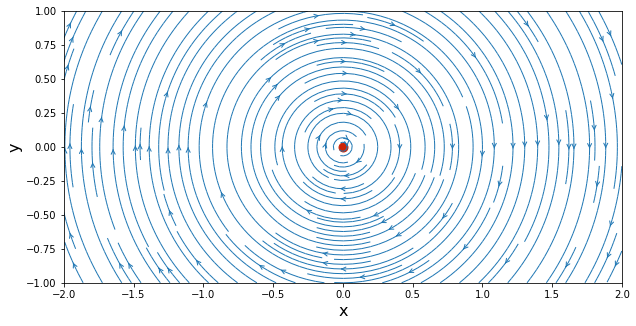

In [7]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width,height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X,Y,u_vortex, v_vortex, density=2, linewidth=1,arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

In [8]:
strength_sink = -1.0           # strength of the sink
x_sink, y_sink = 0.0, 0.0      # loacaton of the sink

In [9]:
# define a the function for the sink velocity
def get_velocity_sink(strength, xs, ys, X, Y):
    u = strength / (2 * numpy.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * numpy.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    return u, v

In [10]:
def get_stream_function_sink(strength, xs, ys, X, Y):
    psi = strength / (2 * numpy.pi) * numpy.arctan2((Y - ys), (X - xs))
    return psi

In [11]:
#compute the velocity field on the mesh grid
u_sink, v_sink = get_velocity_sink(strength_sink, x_sink, y_sink, X, Y)

#compute the stream function on the mesh grid
psi_sink = get_stream_function_sink(strength_sink, x_sink, y_sink, X, Y)


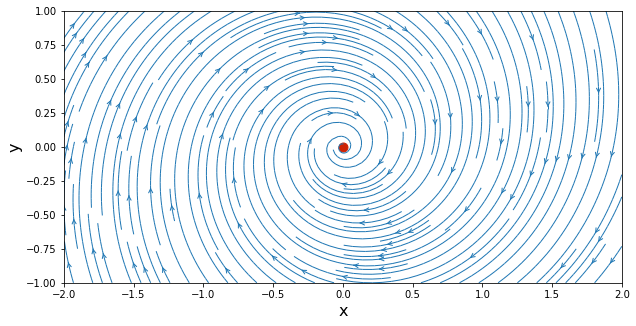

In [12]:
# superposition of the sink and vortex
u = u_vortex + u_sink
v = v_vortex + v_sink
psi = psi_vortex + psi_sink 

# plot the streamline
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');